### Evaluating Tautomer Energies with Auto3D

In this notebook we will generate tautomers for a molecule and use the Neural Network Potential (NNP) in Auto3D to evaluate their enegies.  This notebook borrows heavily from one of the Auto3D [demo notebooks](https://github.com/isayevlab/Auto3D_pkg/blob/main/example/tautomer.ipynb).  Please follow the links below for more information on Auto3D. 

- [Paper](https://pubs.acs.org/doi/10.1021/acs.jcim.2c00817)
- [Documentation](https://auto3d.readthedocs.io/en/latest/index.html)
- [Code](https://github.com/isayevlab/Auto3D_pkg)

This workflow frequently comes into play in virtual screening.  When performing a virtual screen (VS), we typically begin by using a fast, empirical method to generate tautomers for a molecule.  While these empirical methods are fast, they sometimes generate non-physical tautomers.  As a final VS step, it's often useful to evaluate tautomer energetics and ensure that the docked tautomer is among those with the lowest energies.

In the past, one had to run a computationally expensive quantum chemical calculation to obtain relative energies for tautomers.  These calculations could easily require more than a day to calculate the tautomer distribution for a single molecule.  More recently, several groups have developed neural network potentials that use data from more computationally expensive calculations to learn a quantum chemical potential.  Instead of requiring days of computation, these methods can usually calculate tautomer distributions for drug-like molecules in around a minute.  While this isn't necessarily fast enough to process billions of molecules, it can be used to filter several thousand.  By comparing the docked tautomer with the energies calculated by Auto3D we can eliminate any structures which are not in low energy tautomeric states. It's important to remember that Auto3D is trained on gas phase calculations.  The calculated values do not include a solvation component. 

## Important Note
To run this notebook, you need to first set the Google Colab instance type to **GPU**.  To do this:   
1. Select **Runtime** from the menu above
2. Select **Change runtime type**
3. Set **Hardware accelerator** to **T4 GPU**

Install the necessary Python libraries

In [12]:
!pip install auto3D torchani rdkit mols2grid

Import the libraries we'll be using

In [5]:
from rdkit import Chem
import Auto3D
print(Auto3D.__version__)
from Auto3D.auto3D import options
from Auto3D.tautomer import get_stable_tautomers
from rdkit.Chem import PandasTools
import mols2grid

2.2.11


Let's start with an example molecule, this one was inspired by [1bmk](https://www.rcsb.org/structure/1BMK) in the pdb.

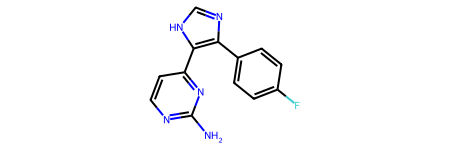

In [6]:
smi_1bmk = "Nc1nccc(n1)-c1[nH]cnc1-c1ccc(F)cc1"
mol_1bmk = Chem.MolFromSmiles(smi_1bmk)
mol_1bmk

Write the SMILES to disk for Auto3D

In [7]:
input_path = "1bmk_ligand.smi"
with open(input_path,"w") as ofs:
    ofs.write(" ".join([smi_1bmk,"1bmk"]))

Run Auto3D

In [8]:
args = options(input_path, k=1, enumerate_tautomer=True, tauto_engine="rdkit",
                optimizing_engine="ANI2xt",  #ANI2xt is NNP designed for tautomers
                max_confs=10, patience=200, use_gpu=True)
tautomer_out = get_stable_tautomers(args, tauto_k=5)

INFO:auto3d:
         _              _             _____   ____  
        / \     _   _  | |_    ___   |___ /  |  _ \ 
       / _ \   | | | | | __|  / _ \    |_ \  | | | |
      / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
     /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.2.11
              // Generating low-energy 3D structures                                      
    
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: 1bmk_ligand.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20240511-190133-558053
INFO:auto3d:enumerate_tautomer: True
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdkit
INFO:auto3d:enumerate_isomer: True
INFO:auto3d:mode_oe: classic
INFO:auto3d:mpi_np: 4
INFO:auto3

Checking input file...


INFO:auto3d:Checking input file...


	There are 1 SMILES in the input file 1bmk_ligand.smi. 
	All SMILES and IDs are valid.


INFO:auto3d:	There are 1 SMILES in the input file 1bmk_ligand.smi. 
	All SMILES and IDs are valid.


Suggestions for choosing isomer_engine and optimizing_engine: 


INFO:auto3d:Suggestions for choosing isomer_engine and optimizing_engine: 


	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.


INFO:auto3d:	Isomer engine options: RDKit and Omega.
INFO:auto3d:	Optimizing engine options: ANI2x, ANI2xt and AIMNET.


The available memory is 15 GB.
The task will be divided into 1 jobs.


INFO:auto3d:The available memory is 15 GB.
INFO:auto3d:The task will be divided into 1 jobs.


Job1, number of inputs: 1


INFO:auto3d:Job1, number of inputs: 1


Energy unit: Hartree if implicit.


INFO:auto3d:Energy unit: Hartree if implicit.


Program running time: 1 minute(s)


INFO:auto3d:Program running time: 1 minute(s)


Output path: /content/1bmk_ligand_20240511-190133-558053/1bmk_ligand_out.sdf


INFO:auto3d:Output path: /content/1bmk_ligand_20240511-190133-558053/1bmk_ligand_out.sdf



Begin to select stable tautomers based on their conformer energies...
Done.
The stable tautomers are stored in: /content/1bmk_ligand_20240511-190133-558053/1bmk_ligand_out_top_tautomers.sdf


Read the output from Auto3D

In [10]:
df = PandasTools.LoadSDF(tautomer_out)

View the Auto3D results.  The numbers below the structures are the relative tautomer energies in kcal/mol. 

In [11]:
mols2grid.display(df,mol_col="ROMol",size=(200,200),subset=["img","E_tautomer_relative(kcal/mol)"],
                  transform={"E_tautomer_relative(kcal/mol)": lambda x: "%.2f" % float(x)})

MolGridWidget()

### Acknowledgements

I'd like to thank Zhen (Jack) Liu for his help with this notebook and contributions to Auto3D. 